In [30]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [31]:
look_back = 15

In [39]:
df = pd.read_csv("datapoints.csv", parse_dates=[0])
df.set_axis(df['timestamp'], inplace=True)

mask = df.name.str.contains("BLOK61")
videolab = df[~mask]
df = videolab
print(len(df))

df

38965


,timestamp,name,attribute_name,value
timestamp,,,,
2021-04-18 05:03:14.376,2021-04-18 05:03:14.376,Philitelaan Videolab,occupied,3.0
2021-04-18 05:04:16.815,2021-04-18 05:04:16.815,Philitelaan Videolab,occupied,3.0
2021-04-23 04:20:38.034,2021-04-23 04:20:38.034,Philitelaan Videolab,occupied,5.0
2021-04-23 04:21:42.956,2021-04-23 04:21:42.956,Philitelaan Videolab,occupied,5.0
2021-04-18 05:05:27.871,2021-04-18 05:05:27.871,Philitelaan Videolab,occupied,3.0
...,...,...,...,...
2021-05-02 04:57:04.904,2021-05-02 04:57:04.904,Philitelaan Videolab,occupied,4.0
2021-05-02 04:58:08.602,2021-05-02 04:58:08.602,Philitelaan Videolab,occupied,4.0
2021-05-02 04:59:08.637,2021-05-02 04:59:08.637,Philitelaan Videolab,occupied,4.0


In [40]:

parking_data = df["value"].values
parking_data = parking_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(parking_data))

parking_train = parking_data[:split]
parking_test = parking_data[split:]

date_train = df["timestamp"][:split]
date_test = df["timestamp"][split:]
parking_train

array([[3.],
       [3.],
       [5.],
       ...,
       [2.],
       [2.],
       [2.]])

In [34]:
train_generator = TimeseriesGenerator(parking_train, parking_train, length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(parking_test, parking_test, length=look_back, batch_size=1)

test_generator.data

array([[2.],
       [3.],
       [2.],
       ...,
       [4.],
       [4.],
       [4.]])

In [41]:
model = Sequential()

model.add(LSTM(10,
        activation='relu',
        input_shape=(look_back,1),
        return_sequences=True)
)

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)


Epoch 1/25
1558/1558 [==============================] - 10s 5ms/step - loss: 15.4469
Epoch 2/25
1558/1558 [==============================] - 8s 5ms/step - loss: 2.5606
Epoch 3/25
1558/1558 [==============================] - 8s 5ms/step - loss: 2.2361
Epoch 4/25
1558/1558 [==============================] - 8s 5ms/step - loss: 2.3972
Epoch 5/25
1558/1558 [==============================] - 8s 5ms/step - loss: 2.2118
Epoch 6/25
1558/1558 [==============================] - 8s 5ms/step - loss: 2.2868
Epoch 7/25
1558/1558 [==============================] - 8s 5ms/step - loss: 2.2601
Epoch 8/25
1558/1558 [==============================] - 8s 5ms/step - loss: 2.1204
Epoch 9/25
1558/1558 [==============================] - 8s 5ms/step - loss: 2.2020
Epoch 10/25
1558/1558 [==============================] - 8s 5ms/step - loss: 2.1467
Epoch 11/25
1558/1558 [==============================] - 8s 5ms/step - loss: 2.1412
Epoch 12/25
1558/1558 [==============================] - 8s 5ms/step - loss: 2.2337

In [36]:
#model.save("1M")

INFO:tensorflow:Assets written to: 1M-preprocessed/assets


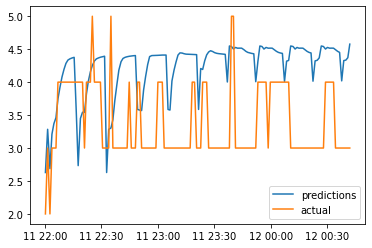

In [42]:
prediction = model.predict(test_generator)

parking_train = parking_train.reshape((-1))
parking_test = parking_test.reshape((-1))
prediction = prediction.reshape((-1))

plt.plot(date_test[:150], prediction[:150], label="predictions")
plt.plot(date_test[:150], parking_test[:150], label="actual")
plt.legend(loc='best')
plt.show()